Regression is a modeling task that involves predicting a numeric value given an input.

Linear regression is the standard algorithm for regression that assumes a linear relationship between inputs and the target variable. An extension to linear regression invokes adding penalties to the loss function during training that encourages simpler models that have smaller coefficient values. These extensions are referred to as regularized linear regression or penalized linear regression.

Ridge Regression is a popular type of regularized linear regression that includes an L2 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.

In this tutorial, you will discover how to develop and evaluate Ridge Regression models in Python.

After completing this tutorial, you will know:

1. Ridge Regression is an extension of linear regression that adds a regularization penalty to the loss function during training.
2. How to evaluate a Ridge Regression model and use a final model to make predictions for new data.
3. How to configure the Ridge Regression model for a new dataset via grid search and automatically.

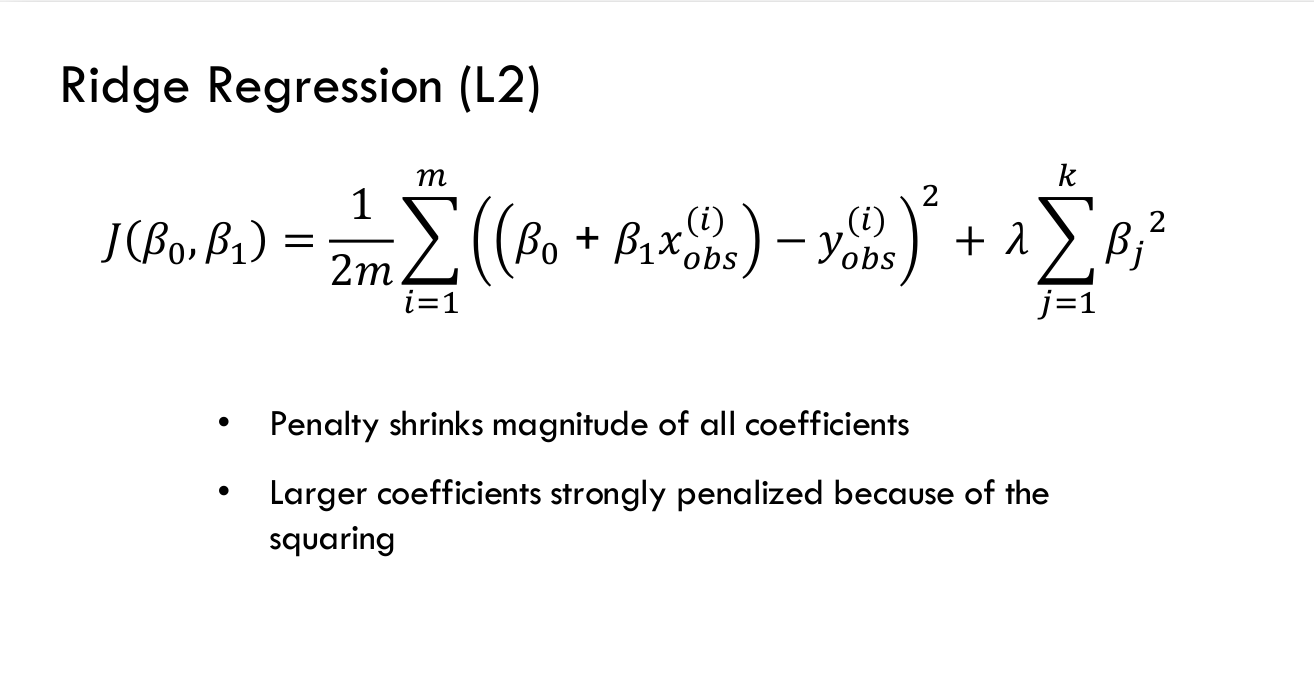

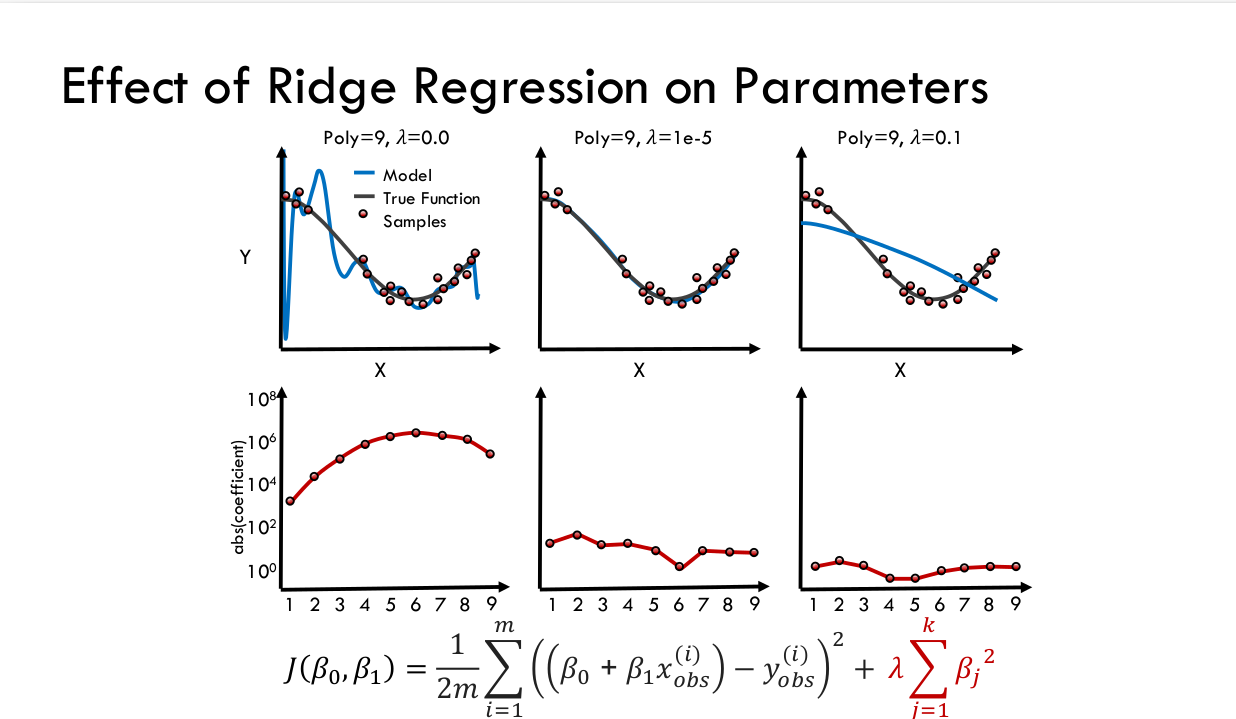

## **Example of Ridge Regression**

In [15]:
#load and summarize the housing dataset 
from pandas import read_csv
from numpy import mean 
from numpy import std 
from numpy import absolute 
from numpy import arange
import matplotlib.pyplot as plt 

#load the dataset 
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)

In [16]:
#summarize shape and first five row 
print(dataframe.shape)
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [17]:
#evaluate an ridge regression model on the dataset 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold

data = dataframe.values 
x,y = data[:, :-1],data[: ,-1]

#define model 
model = Ridge(alpha = 0.5)
#define model evaluation method
cv = RepeatedKFold(n_splits =10, n_repeats =3, random_state =1)
scores = cross_val_score(model,x,y,cv=cv,n_jobs=-1)
#force scores to be positive 
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' %(mean(scores),std(scores)))

Mean MAE: 0.710 (0.095)


In [18]:
#fit model 
model.fit(x,y)
#define new data 
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
#make a prediction 
yhat = model.predict([row])
#summarize prediction
print('Predicted: %.3f' %yhat)

Predicted: 30.157


## **Tuning Ridge Hyperparameters**

How do we know that the default hyperparameters of alpha=1.0 is appropriate for our dataset?

We don’t.

Instead, it is good practice to test a suite of different configurations and discover what works best for our dataset.

One approach would be to grid search alpha values from perhaps 1e-5 to 100 on a log scale and discover what works best for a dataset. Another approach would be to test values between 0.0 and 1.0 with a grid separation of 0.01. We will try the latter in this case.

In [19]:
# grid search hyperparameters for ridge regression
from sklearn.model_selection import GridSearchCV
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.379
Config: {'alpha': 0.51}
